# Machine Learning Minor Project

Importing the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Importing the csv file into a DataFrame.

In [2]:
data = pd.read_csv("appstore_games.csv")

In [3]:
data

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17002,https://apps.apple.com/us/app/stack-puzzle-ris...,1474626442,Stack Puzzle : Rise Tower,"Blast the cubes, solve puzzle!",https://is5-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,NaN,"The goal is very simple, move the square horiz...",Zhigang Pei,4+,EN,64795648.0,Games,"Games, Entertainment, Casual, Strategy",30/07/2019,30/07/2019
17003,https://apps.apple.com/us/app/eachother/id1474...,1474919257,EachOther,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,NaN,Collect a score while you play!!\n\nBy linking...,Sultan Shindi,4+,EN,110341120.0,Games,"Games, Family, Strategy",1/08/2019,1/08/2019
17004,https://apps.apple.com/us/app/rabbit-vs-tortoi...,1474962324,Rabbit Vs Tortoise,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,NaN,"""Rabbit Vs Tortoise is chess type cool simple ...",Vishal Baldha,4+,EN,23207936.0,Games,"Games, Strategy",3/08/2019,3/08/2019
17005,https://apps.apple.com/us/app/fatall/id1474963671,1474963671,FaTaLL,Most fun game!!!,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,"9.99, 49.99, 3.99",Upgrade your character and use your skills to ...,Tayrem Games,4+,EN,196750336.0,Games,"Games, Strategy, Action",1/08/2019,1/08/2019


## 1. Data Preparation & Cleaning

First we'll drop the unrequired columns

In [4]:
data=data.drop(['Name','URL', 'ID','Subtitle','Icon URL','Description','Developer','Age Rating','Languages','Size','Primary Genre','Original Release Date','Current Version Release Date'], axis=1)
data

,Average User Rating,User Rating Count,Price,In-app Purchases,Genres
0,4.0,3553.0,2.99,NaN,"Games, Strategy, Puzzle"
1,3.5,284.0,1.99,NaN,"Games, Strategy, Board"
2,3.0,8376.0,0.00,NaN,"Games, Board, Strategy"
3,3.5,190394.0,0.00,NaN,"Games, Strategy, Puzzle"
4,3.5,28.0,2.99,NaN,"Games, Strategy, Board, Education"
...,...,...,...,...,...
17002,NaN,NaN,0.00,NaN,"Games, Entertainment, Casual, Strategy"
17003,NaN,NaN,0.00,NaN,"Games, Family, Strategy"
17004,NaN,NaN,0.00,NaN,"Games, Strategy"
17005,NaN,NaN,0.00,"9.99, 49.99, 3.99","Games, Strategy, Action"


First, let's remove those rows where user rating is NaN

In [5]:
data = data[pd.notnull(data['User Rating Count'])]
data = data[pd.notnull(data['Price'])]
data = data[pd.notnull(data['Genres'])]
data.head(20)

,Average User Rating,User Rating Count,Price,In-app Purchases,Genres
0,4.0,3553.0,2.99,NaN,"Games, Strategy, Puzzle"
1,3.5,284.0,1.99,NaN,"Games, Strategy, Board"
2,3.0,8376.0,0.00,NaN,"Games, Board, Strategy"
3,3.5,190394.0,0.00,NaN,"Games, Strategy, Puzzle"
4,3.5,28.0,2.99,NaN,"Games, Strategy, Board, Education"
5,3.0,47.0,0.00,1.99,"Games, Entertainment, Strategy, Puzzle"
6,2.5,35.0,0.00,NaN,"Games, Entertainment, Puzzle, Strategy"
7,2.5,125.0,0.99,NaN,"Games, Strategy, Board"
8,2.5,44.0,0.00,NaN,"Games, Strategy, Board, Entertainment"
9,2.5,184.0,0.00,NaN,"Games, Casual, Strategy"


In [6]:
data=data.reset_index(drop=True)

In [7]:
data

,Average User Rating,User Rating Count,Price,In-app Purchases,Genres
0,4.0,3553.0,2.99,NaN,"Games, Strategy, Puzzle"
1,3.5,284.0,1.99,NaN,"Games, Strategy, Board"
2,3.0,8376.0,0.00,NaN,"Games, Board, Strategy"
3,3.5,190394.0,0.00,NaN,"Games, Strategy, Puzzle"
4,3.5,28.0,2.99,NaN,"Games, Strategy, Board, Education"
...,...,...,...,...,...
7556,3.0,6.0,0.00,NaN,"Games, Strategy, Entertainment, Puzzle"
7557,5.0,30.0,0.00,NaN,"Games, Entertainment, Action, Strategy"
7558,5.0,51.0,0.00,NaN,"Games, Simulation, Strategy"
7559,5.0,5.0,0.00,NaN,"Games, Simulation, Strategy"


There are multiple genres listed in each row of "Genres". As we already know that all the games in the dataset are strategic games, we can remove "Strategy" and "Games" from each row in the Genres column.

In [8]:
data['Genres']=data['Genres'].replace(regex=['Strategy, '], value='')
data['Genres']=data['Genres'].replace(regex=['Games, '], value='')
data['Genres']=data['Genres'].replace(regex=[', Strategy'], value='')
data['Genres']=data['Genres'].replace(regex=[', Games'], value='')

In [9]:
data.head()

,Average User Rating,User Rating Count,Price,In-app Purchases,Genres
0,4.0,3553.0,2.99,NaN,Puzzle
1,3.5,284.0,1.99,NaN,Board
2,3.0,8376.0,0.00,NaN,Board
3,3.5,190394.0,0.00,NaN,Puzzle
4,3.5,28.0,2.99,NaN,"Board, Education"


There are still multiple genres listed in Genres. We'll take only the first genre listed to make the analysis simpler. 

In [10]:
data['Genres']=data['Genres'].replace(regex=[',(.)*'], value='')
data.head(10)

,Average User Rating,User Rating Count,Price,In-app Purchases,Genres
0,4.0,3553.0,2.99,NaN,Puzzle
1,3.5,284.0,1.99,NaN,Board
2,3.0,8376.0,0.00,NaN,Board
3,3.5,190394.0,0.00,NaN,Puzzle
4,3.5,28.0,2.99,NaN,Board
5,3.0,47.0,0.00,1.99,Entertainment
6,2.5,35.0,0.00,NaN,Entertainment
7,2.5,125.0,0.99,NaN,Board
8,2.5,44.0,0.00,NaN,Board
9,2.5,184.0,0.00,NaN,Casual


## 2. Finding the most significant genres

We'll now count the number of games in each genre.

In [11]:
genre_freq=pd.DataFrame(data.Genres.value_counts())
genre_freq=genre_freq.reset_index()
genre_freq.columns=['Genre','Count']
genre_freq

,Genre,Count
0,Entertainment,1925
1,Puzzle,914
2,Simulation,901
3,Action,740
4,Board,583
5,Role Playing,571
6,Casual,365
7,Adventure,230
8,Card,218
9,Strategy,216


Let's plot this data in a pie chart to better visualize it.

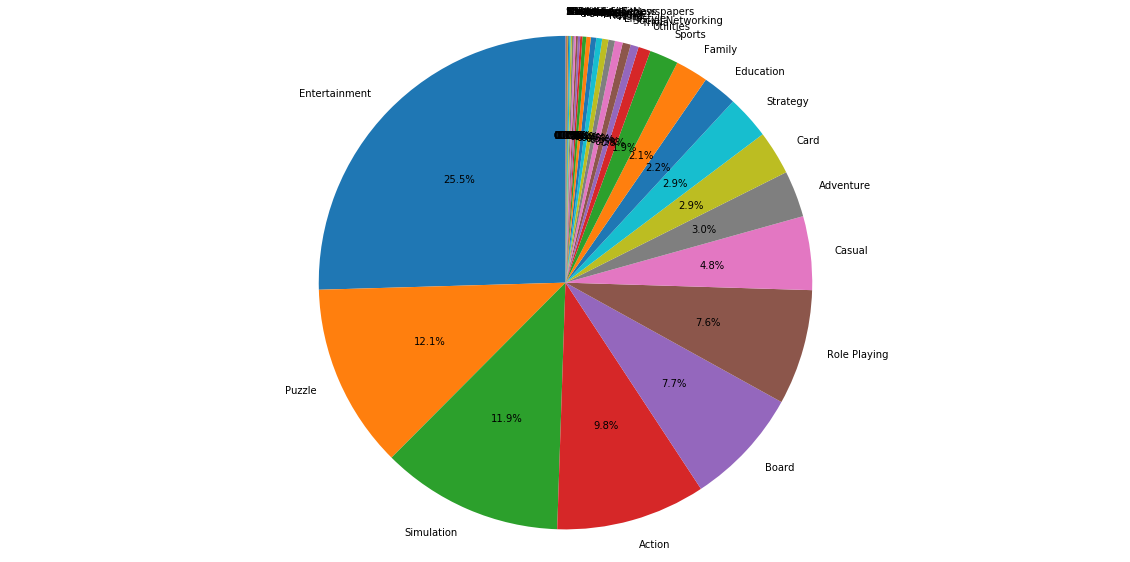

<Figure size 2880x1440 with 0 Axes>

In [12]:
fig1, ax1 = plt.subplots(figsize=(20, 10))

ax1.pie(genre_freq['Count'], labels=genre_freq['Genre'], autopct='%1.1f%%',startangle=90,radius=10)
ax1.axis('equal')
plt.figure(figsize=(40,20))

plt.show()

Thus the most significant genres are:
1. Entertainment
2. Puzzle
3. Simulation
4. Action
5. Board and Role Playing (almost same)

We are concerned with those apps whose user rating is at least 4.0 and above. Let's extract that from the data DataFrame

In [13]:
data_top=data[data['Average User Rating']>=4.0]
data_top

,Average User Rating,User Rating Count,Price,In-app Purchases,Genres
0,4.0,3553.0,2.99,NaN,Puzzle
21,4.0,637.0,0.99,NaN,Puzzle
23,4.0,41869.0,2.99,"0.99, 0.99, 0.99, 0.99",Entertainment
27,4.0,523.0,2.99,NaN,Entertainment
29,4.0,156.0,5.99,NaN,Board
...,...,...,...,...,...
7555,5.0,11.0,0.00,0.99,Utilities
7557,5.0,30.0,0.00,NaN,Entertainment
7558,5.0,51.0,0.00,NaN,Simulation
7559,5.0,5.0,0.00,NaN,Simulation


We can do the same analysis as before

There may be many apps in the dataset that have low number of users rating, and hence a high average rating. To make the analysis a little more accurate let's only consider those apps where the total number of user that have rated is more than 100.

In [14]:
data_top=data_top[data_top['User Rating Count']>200]
data_top

,Average User Rating,User Rating Count,Price,In-app Purchases,Genres
0,4.0,3553.0,2.99,NaN,Puzzle
21,4.0,637.0,0.99,NaN,Puzzle
23,4.0,41869.0,2.99,"0.99, 0.99, 0.99, 0.99",Entertainment
27,4.0,523.0,2.99,NaN,Entertainment
30,4.0,3062.0,7.99,NaN,Board
...,...,...,...,...,...
7517,4.5,354.0,0.00,"9.99, 4.99, 4.99, 2.99, 9.99, 0.99, 1.99, 2.99...",Puzzle
7521,5.0,658.0,0.00,2.99,Puzzle
7522,4.5,1197.0,0.00,NaN,Action
7523,5.0,267.0,0.00,"0.99, 4.99, 19.99, 9.99, 24.99, 2.99, 1.99, 99...",Entertainment


In [15]:
genre_freq_top=pd.DataFrame(data_top.Genres.value_counts())
genre_freq_top=genre_freq_top.reset_index()
genre_freq_top.columns=['Genre','Count']
genre_freq_top

,Genre,Count
0,Entertainment,527
1,Simulation,296
2,Action,247
3,Role Playing,216
4,Puzzle,150
5,Board,111
6,Card,63
7,Casual,59
8,Adventure,53
9,Family,41


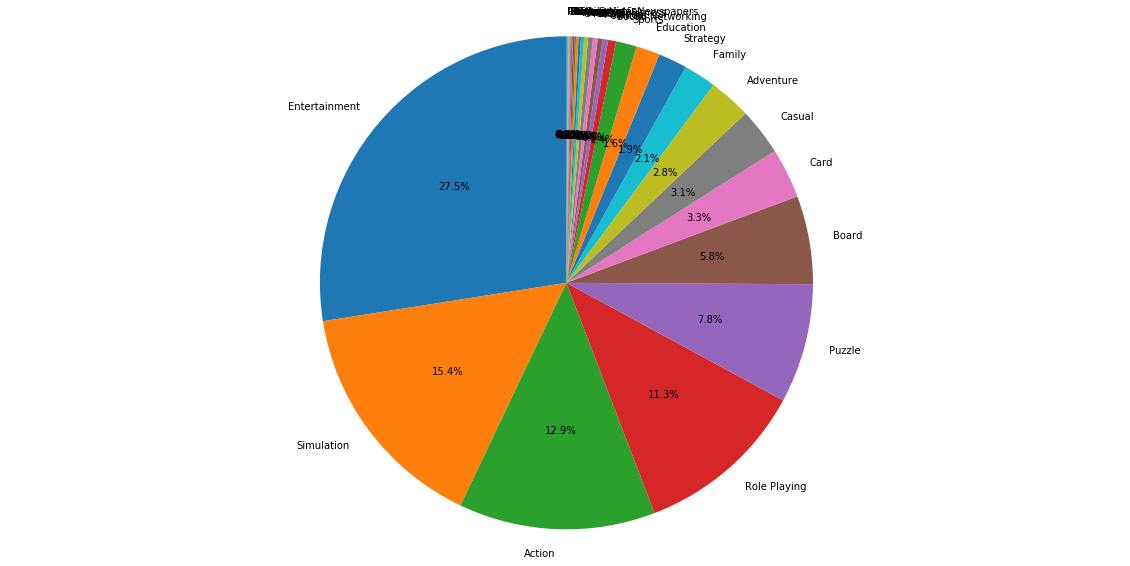

<Figure size 2880x1440 with 0 Axes>

In [16]:
fig3, ax3 = plt.subplots(figsize=(20, 10))

ax3.pie(genre_freq_top['Count'], labels=genre_freq_top['Genre'], autopct='%1.1f%%',startangle=90,radius=10)
ax3.axis('equal')
plt.figure(figsize=(40,20))

plt.show()

Not a significant difference. But the most significant genres when only considering apps with a rating of at least 4.0/5.0 are:
1. Entertainment
2. Simulation
3. Action
4. Role Playing
5. Puzzle

Comparing this from the previous chart, board seems to have become significantly less popular.

## 3. Finding trends between User Rating and Price

Extract the columns needed.

In [17]:
data_price=data[['Average User Rating','Price']]
data_price

,Average User Rating,Price
0,4.0,2.99
1,3.5,1.99
2,3.0,0.00
3,3.5,0.00
4,3.5,2.99
...,...,...
7556,3.0,0.00
7557,5.0,0.00
7558,5.0,0.00
7559,5.0,0.00


For simplicity add label "Free" to free apps and "Paid" for paid apps

In [18]:
label = []
for index, row in data_price.iterrows():
    if row['Price']>0.00:
        label.append('Paid')
    else:
        label.append('Free')

In [19]:
label

['Paid',
 'Paid',
 'Free',
 'Free',
 'Paid',
 'Free',
 'Free',
 'Paid',
 'Free',
 'Free',
 'Free',
 'Free',
 'Paid',
 'Free',
 'Free',
 'Free',
 'Free',
 'Free',
 'Free',
 'Paid',
 'Paid',
 'Paid',
 'Free',
 'Paid',
 'Free',
 'Paid',
 'Paid',
 'Paid',
 'Free',
 'Paid',
 'Paid',
 'Paid',
 'Paid',
 'Paid',
 'Free',
 'Free',
 'Paid',
 'Free',
 'Paid',
 'Paid',
 'Paid',
 'Paid',
 'Paid',
 'Paid',
 'Paid',
 'Free',
 'Paid',
 'Free',
 'Free',
 'Paid',
 'Paid',
 'Free',
 'Paid',
 'Free',
 'Paid',
 'Free',
 'Free',
 'Free',
 'Free',
 'Paid',
 'Paid',
 'Paid',
 'Paid',
 'Free',
 'Paid',
 'Paid',
 'Paid',
 'Paid',
 'Free',
 'Free',
 'Free',
 'Free',
 'Paid',
 'Free',
 'Paid',
 'Paid',
 'Paid',
 'Free',
 'Free',
 'Free',
 'Free',
 'Paid',
 'Free',
 'Paid',
 'Free',
 'Paid',
 'Paid',
 'Free',
 'Free',
 'Free',
 'Free',
 'Free',
 'Free',
 'Paid',
 'Free',
 'Paid',
 'Paid',
 'Paid',
 'Paid',
 'Free',
 'Paid',
 'Paid',
 'Free',
 'Free',
 'Paid',
 'Free',
 'Paid',
 'Free',
 'Paid',
 'Paid',
 'Free',
 

In [20]:
data_price['Price Label']=label
data_price=data_price.drop(['Price'],axis=1)

/home/richa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
data_price

,Average User Rating,Price Label
0,4.0,Paid
1,3.5,Paid
2,3.0,Free
3,3.5,Free
4,3.5,Paid
...,...,...
7556,3.0,Free
7557,5.0,Free
7558,5.0,Free
7559,5.0,Free


Now we'll count the number of apps (Free or Paid) for each rating. Luckily the Average User Rating is given in discrete values of 1.0, 1.5, 2.0 and so on.

In [22]:
data_price_freq=data_price.groupby(['Average User Rating', 'Price Label']).size()
data_price_freq=pd.DataFrame(data_price_freq)

In [23]:
data_price_freq=data_price_freq.reset_index()
data_price_freq.columns=['Average User Rating','Price Label','Frequency']

In [24]:
data_price_freq

,Average User Rating,Price Label,Frequency
0,1.0,Free,5
1,1.0,Paid,9
2,1.5,Free,46
3,1.5,Paid,14
4,2.0,Free,136
5,2.0,Paid,22
6,2.5,Free,268
7,2.5,Paid,49
8,3.0,Free,427
9,3.0,Paid,87


We'll convert the frequency to percentages so that we can make the values independent of number of apps under each rating.

In [25]:
percent=[]
for i in range(0, data_price_freq.shape[0]):
    if data_price_freq.iloc[i]['Price Label']=='Free':
        x=100.0*(data_price_freq.iloc[i]['Frequency']/(data_price_freq.iloc[i]['Frequency']+data_price_freq.iloc[i+1]['Frequency']))
        percent.append(x)
    else:
        percent.append(100-x)

In [26]:
percent = [ round(ele, 2) for ele in percent ]

In [27]:
percent

[35.71,
 64.29,
 76.67,
 23.33,
 86.08,
 13.92,
 84.54,
 15.46,
 83.07,
 16.93,
 81.95,
 18.05,
 82.06,
 17.94,
 84.69,
 15.31,
 85.76,
 14.24]

In [28]:
data_price_freq['Percent']=percent

In [29]:
data_price_freq

,Average User Rating,Price Label,Frequency,Percent
0,1.0,Free,5,35.71
1,1.0,Paid,9,64.29
2,1.5,Free,46,76.67
3,1.5,Paid,14,23.33
4,2.0,Free,136,86.08
5,2.0,Paid,22,13.92
6,2.5,Free,268,84.54
7,2.5,Paid,49,15.46
8,3.0,Free,427,83.07
9,3.0,Paid,87,16.93


Let's plot a bar graph depicting the difference between amount of Free and Paid apps for each rating.

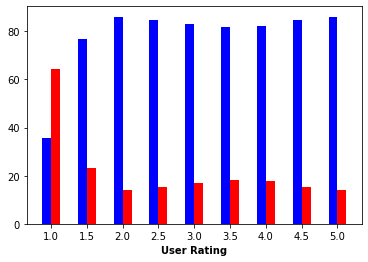

In [30]:
y1 = data_price_freq[data_price_freq['Price Label'] == 'Free'].Percent
y2 = data_price_freq[data_price_freq['Price Label'] == 'Paid'].Percent

r1 = np.arange(9)

plt.bar(r1-0.125, y1, color = 'b', width = 0.25)
plt.bar(r1+0.125,y2, color = 'r', width = 0.25)
plt.xlabel('User Rating', fontweight='bold')
plt.xticks([r for r in range(9)], ['1.0', '1.5', '2.0', '2.5', '3.0', '3.5', '4.0', '4.5','5.0'])

plt.show()

It seems like apart from 1.0, for all other ratings, the percentage of Free apps is around the same.

We have not yet considered that free apps may have in-app purchases. Let's create a dataframe where all apps with in-app purchases come under "Paid".

In [31]:
data_price2=data_price
data_price2['InApp']=data['In-app Purchases']
data_price2

,Average User Rating,Price Label,InApp
0,4.0,Paid,NaN
1,3.5,Paid,NaN
2,3.0,Free,NaN
3,3.5,Free,NaN
4,3.5,Paid,NaN
...,...,...,...
7556,3.0,Free,NaN
7557,5.0,Free,NaN
7558,5.0,Free,NaN
7559,5.0,Free,NaN


In [32]:
label = []
for i in range(0, data_price2.shape[0]):
    if data_price2.isnull().iloc[i]['InApp']==True:
        x=data_price2.iloc[i]['Price Label']
        label.append(x)
    else:
        label.append('Paid')

In [33]:
label

['Paid',
 'Paid',
 'Free',
 'Free',
 'Paid',
 'Paid',
 'Free',
 'Paid',
 'Free',
 'Free',
 'Free',
 'Free',
 'Paid',
 'Free',
 'Paid',
 'Paid',
 'Free',
 'Paid',
 'Paid',
 'Paid',
 'Paid',
 'Paid',
 'Free',
 'Paid',
 'Free',
 'Paid',
 'Paid',
 'Paid',
 'Paid',
 'Paid',
 'Paid',
 'Paid',
 'Paid',
 'Paid',
 'Free',
 'Paid',
 'Paid',
 'Free',
 'Paid',
 'Paid',
 'Paid',
 'Paid',
 'Paid',
 'Paid',
 'Paid',
 'Free',
 'Paid',
 'Free',
 'Free',
 'Paid',
 'Paid',
 'Paid',
 'Paid',
 'Free',
 'Paid',
 'Free',
 'Free',
 'Free',
 'Free',
 'Paid',
 'Paid',
 'Paid',
 'Paid',
 'Paid',
 'Paid',
 'Paid',
 'Paid',
 'Paid',
 'Free',
 'Paid',
 'Free',
 'Paid',
 'Paid',
 'Free',
 'Paid',
 'Paid',
 'Paid',
 'Free',
 'Free',
 'Free',
 'Free',
 'Paid',
 'Free',
 'Paid',
 'Paid',
 'Paid',
 'Paid',
 'Paid',
 'Free',
 'Free',
 'Free',
 'Free',
 'Free',
 'Paid',
 'Paid',
 'Paid',
 'Paid',
 'Paid',
 'Paid',
 'Free',
 'Paid',
 'Paid',
 'Paid',
 'Free',
 'Paid',
 'Paid',
 'Paid',
 'Free',
 'Paid',
 'Paid',
 'Free',
 

In [34]:
data_price2['Price Label']=label

In [35]:
data_price2.head(200)

,Average User Rating,Price Label,InApp
0,4.0,Paid,NaN
1,3.5,Paid,NaN
2,3.0,Free,NaN
3,3.5,Free,NaN
4,3.5,Paid,NaN
...,...,...,...
195,2.5,Free,NaN
196,3.5,Paid,0.99
197,2.5,Free,NaN
198,4.0,Paid,NaN


In [36]:
data_price2=data_price2.drop(['InApp'],axis=1)

Now we follow the same procedure that we had done before.

In [37]:
data_price_freq2=data_price2.groupby(['Average User Rating', 'Price Label']).size()
data_price_freq2=pd.DataFrame(data_price_freq2)
data_price_freq2=data_price_freq2.reset_index()
data_price_freq2.columns=['Average User Rating','Price Label','Frequency']
data_price_freq2

,Average User Rating,Price Label,Frequency
0,1.0,Free,5
1,1.0,Paid,9
2,1.5,Free,24
3,1.5,Paid,36
4,2.0,Free,72
5,2.0,Paid,86
6,2.5,Free,144
7,2.5,Paid,173
8,3.0,Free,197
9,3.0,Paid,317


In [38]:
percent=[]
for i in range(0, data_price_freq2.shape[0]):
    if data_price_freq2.iloc[i]['Price Label']=='Free':
        x=100.0*(data_price_freq2.iloc[i]['Frequency']/(data_price_freq2.iloc[i]['Frequency']+data_price_freq2.iloc[i+1]['Frequency']))
        percent.append(x)
    else:
        percent.append(100-x)
percent = [ round(ele, 2) for ele in percent ]
data_price_freq2['Percent']=percent
data_price_freq2

,Average User Rating,Price Label,Frequency,Percent
0,1.0,Free,5,35.71
1,1.0,Paid,9,64.29
2,1.5,Free,24,40.00
3,1.5,Paid,36,60.00
4,2.0,Free,72,45.57
5,2.0,Paid,86,54.43
6,2.5,Free,144,45.43
7,2.5,Paid,173,54.57
8,3.0,Free,197,38.33
9,3.0,Paid,317,61.67


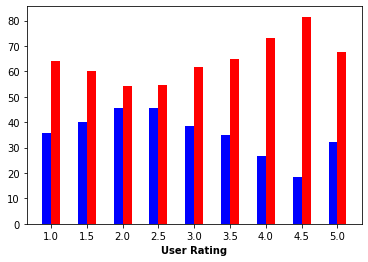

In [39]:
y1 = data_price_freq2[data_price_freq2['Price Label'] == 'Free'].Percent
y2 = data_price_freq2[data_price_freq2['Price Label'] == 'Paid'].Percent

r1 = np.arange(9)

plt.bar(r1-0.125, y1, color = 'b', width = 0.25)
plt.bar(r1+0.125,y2, color = 'r', width = 0.25)
plt.xlabel('User Rating', fontweight='bold')
plt.xticks([r for r in range(9)], ['1.0', '1.5', '2.0', '2.5', '3.0', '3.5', '4.0', '4.5','5.0'])

plt.show()

The number of paid apps have increased quite significantly! This implies that the majority of Free Apps contain InApp purchases. But regardless, people still use these Apps. Perhaps many only use the free features of the apps.
There seems to be in increase of popularity from 2.0 to 4.5. This may mean that having free games with in-app purchases results makes it more likely for the game to have a better rating.

## 4. Analysing Entertainment genre only

Since we know that entertainment genre is the most significant genre, we can limit the analysis of price and user rating to Entertainment only. This can be extended to other genres as well.

In [40]:
ent_price=data[data['Genres']=='Entertainment']
ent_price=ent_price.drop(['User Rating Count','In-app Purchases','Genres'],axis=1)

In [41]:
ent_price

,Average User Rating,Price
5,3.0,0.00
6,2.5,0.00
11,3.0,0.00
19,3.0,0.99
20,2.0,0.99
...,...,...
7538,5.0,0.00
7541,5.0,0.00
7550,5.0,0.00
7556,3.0,0.00


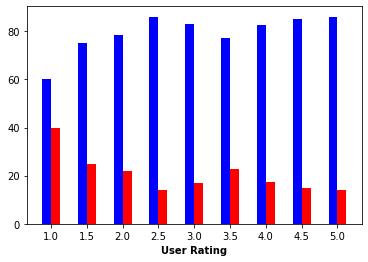

In [42]:
label = []
for index, row in ent_price.iterrows():
    if row['Price']>0.00:
        label.append('Paid')
    else:
        label.append('Free')
ent_price['Price Label']=label
ent_price=ent_price.drop(['Price'],axis=1)
ent_price_freq=ent_price.groupby(['Average User Rating', 'Price Label']).size()
ent_price_freq=pd.DataFrame(ent_price_freq)
ent_price_freq=ent_price_freq.reset_index()
ent_price_freq.columns=['Average User Rating','Price Label','Frequency']

percent=[]
for i in range(0, ent_price_freq.shape[0]):
    if ent_price_freq.iloc[i]['Price Label']=='Free':
        x=100.0*(ent_price_freq.iloc[i]['Frequency']/(ent_price_freq.iloc[i]['Frequency']+ent_price_freq.iloc[i+1]['Frequency']))
        percent.append(x)
    else:
        percent.append(100-x)
percent = [ round(ele, 2) for ele in percent ]
ent_price_freq['Percent']=percent

y1 = ent_price_freq[ent_price_freq['Price Label'] == 'Free'].Percent
y2 = ent_price_freq[ent_price_freq['Price Label'] == 'Paid'].Percent

r1 = np.arange(9)

plt.bar(r1-0.125, y1, color = 'b', width = 0.25)
plt.bar(r1+0.125,y2, color = 'r', width = 0.25)
plt.xlabel('User Rating', fontweight='bold')
plt.xticks([r for r in range(9)], ['1.0', '1.5', '2.0', '2.5', '3.0', '3.5', '4.0', '4.5','5.0'])

plt.show()

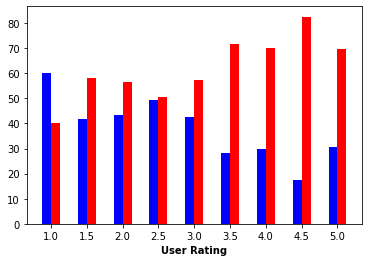

In [43]:
ent_price2=ent_price
ent_price2['InApp']=data['In-app Purchases']
ent_price2
label = []
for i in range(0, ent_price2.shape[0]):
    if ent_price2.isnull().iloc[i]['InApp']==True:
        x=ent_price2.iloc[i]['Price Label']
        label.append(x)
    else:
        label.append('Paid')
ent_price2['Price Label']=label
ent_price2=ent_price2.drop(['InApp'],axis=1)
ent_price_freq2=ent_price2.groupby(['Average User Rating', 'Price Label']).size()
ent_price_freq2=pd.DataFrame(ent_price_freq2)
ent_price_freq2=ent_price_freq2.reset_index()
ent_price_freq2.columns=['Average User Rating','Price Label','Frequency']
ent_price_freq2
percent=[]
for i in range(0, ent_price_freq2.shape[0]):
    if ent_price_freq2.iloc[i]['Price Label']=='Free':
        x=100.0*(ent_price_freq2.iloc[i]['Frequency']/(ent_price_freq2.iloc[i]['Frequency']+ent_price_freq2.iloc[i+1]['Frequency']))
        percent.append(x)
    else:
        percent.append(100-x)
percent = [ round(ele, 2) for ele in percent ]
ent_price_freq2['Percent']=percent
ent_price_freq2
y1 = ent_price_freq2[ent_price_freq2['Price Label'] == 'Free'].Percent
y2 = ent_price_freq2[ent_price_freq2['Price Label'] == 'Paid'].Percent

r1 = np.arange(9)

plt.bar(r1-0.125, y1, color = 'b', width = 0.25)
plt.bar(r1+0.125,y2, color = 'r', width = 0.25)
plt.xlabel('User Rating', fontweight='bold')
plt.xticks([r for r in range(9)], ['1.0', '1.5', '2.0', '2.5', '3.0', '3.5', '4.0', '4.5','5.0'])

plt.show()

As can be seen, the Entertainment genre distribution is about the same as for all the whole dataset.

## 5. Inferences

We can conclude that if an app developer were to create a strategy game and release it in the app store, he/she would likely get the most success (in terms of rating) if the game belonged to one of the following genres:
1. Entertainment
2. Simulation
3. Action
4. Role Playing
5. Puzzle

As can be seen from the pie chart, these 5 genres alone comprise around 75% of the total games, when there are 35 genres.

When it comes to pricing, there doesn't seem to be a significant correlation between a game's price and its user rating. The vast majority of games are free to download, among all ratings. However, I had simplified the problem by considering all paid games under one category. New inferences may be drawn if the correlation is treated as a regression problem.

That being said, most of the free games have in-app purchases. We can also see that when considering in-app purchases across all genres, the popularity seems to increase from 2.0 to 4.5, indicating a possible correlation between rating and free games with in-app purchases. This implies that people still download free games even if there are paid features within the app. From this we can conclude that when deciding the pricing of the game, it is better to make the game freely downloadable and have additional paid features within the app, rather than put a price upfront. This may give the game better ratings.